In [1]:
# Imorting necessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/Admin/Desktop/Time Series Data.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.columns=["Month","Sale"]

In [5]:
df.head()

,Month,Sale
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [6]:
df.shape

(105, 2)

In [7]:
 #converting data type to date time format

In [8]:
df["Month"]=pd.to_datetime(df["Month"])

In [9]:
df.head()

,Month,Sale
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [10]:
df.dtypes

Month    datetime64[ns]
Sale              int64
dtype: object

In [11]:
df.set_index('Month',inplace=True)
df.head()

,Sale
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [12]:
df.dtypes

Sale    int64
dtype: object

In [13]:
#checking wheather time series is stationry or not

<AxesSubplot:xlabel='Month'>

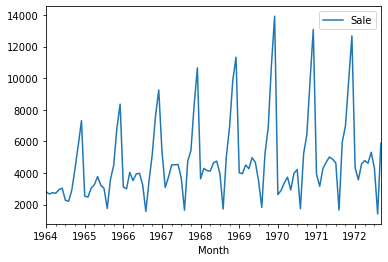

In [14]:
df.plot()

In [15]:
#Seasonality=2
#at the end of each year the sales is increasing

In [16]:
#point of analysis(POA)
#1. the time series is not stationary
#2. we observed seanality twice
#2.1 It fall in mid of the year
#2.2 It rise toward end of the year
#3. We see that there is autocorrelation in the data


In [17]:
#to find and validate if the data is non stationary or not we run AD-fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
ad1=adfuller(df["Sale"])

In [20]:
ad1

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [21]:
# we only see first four values
#first value is ADF test statistics
#second value is P value
#third value is seasonality
#forth value is no. of records without lags

In [22]:
# We dont rely on ADF Test statistics
#beacuse its calculated by some mathematical formula
# 2nd, 3rd and 4th values are importtant for us

In [23]:
#hypothesis of ADF Test
#null hypothesis H0= the data is non stationary
#alternative hypothesis Ha= the data is stationary


In [24]:
# if p value is greater than alpha (0.05),then we accept null hypothesis

In [25]:
#In order to make stationary, taking 1st order diff

In [26]:
df['First_diff']=df["Sale"].shift(1)-df["Sale"]

In [27]:
df.head(10)

,Sale,First_diff
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,143.0
1964-03-01,2755,-83.0
1964-04-01,2721,34.0
1964-05-01,2946,-225.0
1964-06-01,3036,-90.0
1964-07-01,2282,754.0
1964-08-01,2212,70.0
1964-09-01,2922,-710.0


<AxesSubplot:xlabel='Month'>

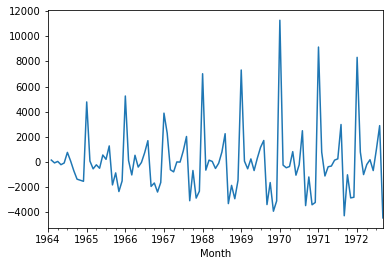

In [28]:
df['First_diff'].plot()

In [29]:
ad2=adfuller(df['First_diff'].dropna())
ad2

(-7.1898964480510115,
 2.5196204473869244e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.826726291589)

In [30]:
#here we see that P value is less than 0.05, hence accepting alternate hypothesis

In [31]:
#estimate p, q & d
#p stands for order of the AR model, e.g AR1, AR2, AR3 etc
#q stands for order of moving average model, e.g-MA1, MA2, MA3 etc
#d stands for order of difference, e.g- first order, second order


In [32]:
#In order to find out above values we use ACF(Autocorrilation function), PACF(Partial Autocorrilation function)

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

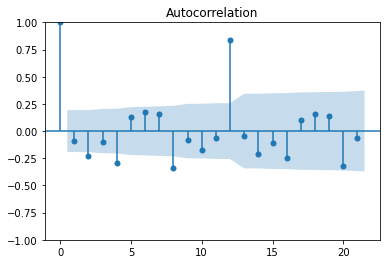

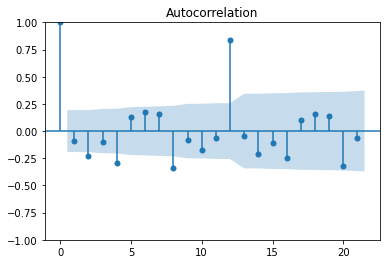

In [34]:
plot_acf(df['First_diff'].dropna())

In [35]:
# We consider ACF plot as best indication method to find out the q value(q value=1)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


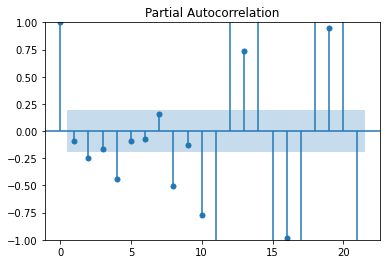

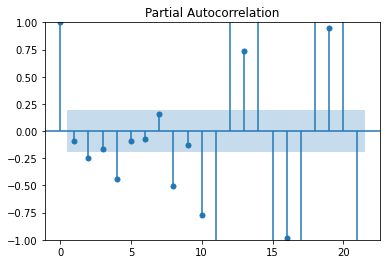

In [36]:
plot_pacf(df['First_diff'].dropna())

In [37]:
# we consider pacf is best method  for indication p value

In [38]:
# fitting model

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
arima=ARIMA(df["Sale"],order=(1,1,1))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
arima=arima.fit()

In [42]:
df["forecast"]=arima.predict(start=95,end=120,dynamic=True)

<AxesSubplot:xlabel='Month'>

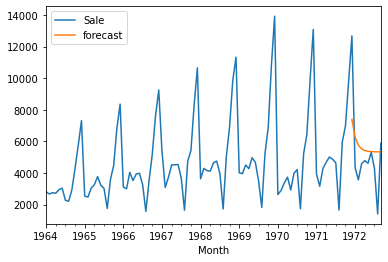

In [43]:
df[["Sale","forecast"]].plot()

In [44]:
#  as the above model is not taking seasonality into consideration using sarimax

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [49]:
sarimax = SARIMAX(df['Sale'],order= (1,1,1),seasonal_order= (1,1,1,12))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
sarimax = sarimax.fit()

In [51]:
df['seasonal_forecast']=sarimax.predict(start = 95 ,end = 105 ,dynamic =True)

<AxesSubplot:xlabel='Month'>

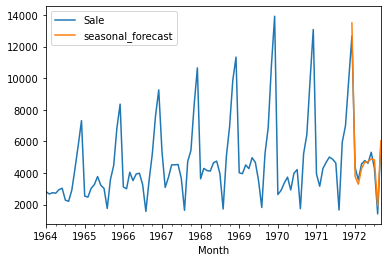

In [52]:
df[['Sale','seasonal_forecast']].plot()

In [53]:
#future predictions

In [54]:
df.index[-9]

Timestamp('1972-01-01 00:00:00')

In [55]:
future_days = [df.index[-9]+pd.tseries.offsets.DateOffset(month =x)for x  in range(13)]

In [56]:
future_days[10:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00')]

In [57]:
new_df = pd.DataFrame(index = future_days[10:],columns =df.columns)

In [58]:
new_df

,Sale,First_diff,forecast,seasonal_forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN


In [59]:
new_df =  pd.concat([df,new_df])

In [60]:
new_df.tail()

,Sale,First_diff,forecast,seasonal_forecast
1972-08-01,1413,2885.0,5340.054511,1911.734534
1972-09-01,5877,-4464.0,5338.016591,6037.407299
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN


In [61]:
new_df['seasonal_forecast']=sarimax.predict(start = 105 ,end = 110 ,dynamic =True)

In [62]:
new_df.tail()

,Sale,First_diff,forecast,seasonal_forecast
1972-08-01,1413,2885.0,5340.054511,NaN
1972-09-01,5877,-4464.0,5338.016591,NaN
1972-10-01,NaN,NaN,NaN,7023.698974
1972-11-01,NaN,NaN,NaN,9996.175696
1972-12-01,NaN,NaN,NaN,12891.997832
